<a href="https://colab.research.google.com/github/ridvanyigit/My-Projects/blob/main/Social_Network_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
# Load the dataset
df = pd.read_csv('Social_Network_Ads.csv')

# Display the first few rows of the dataset
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
# Display column names and basic info
print("Columns in the dataset:", df.columns)
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Columns in the dataset: Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
Missing values in each column:
 User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [21]:
# Drop 'User ID' column as it is not useful for modeling
df.drop("User ID", axis="columns", inplace=True)

# Encode 'Gender' column: Male as 1, Female as 0
if "Male" in df['Gender'].unique():
    df['Gender'] = df['Gender'].map({"Male": 1, "Female": 0})

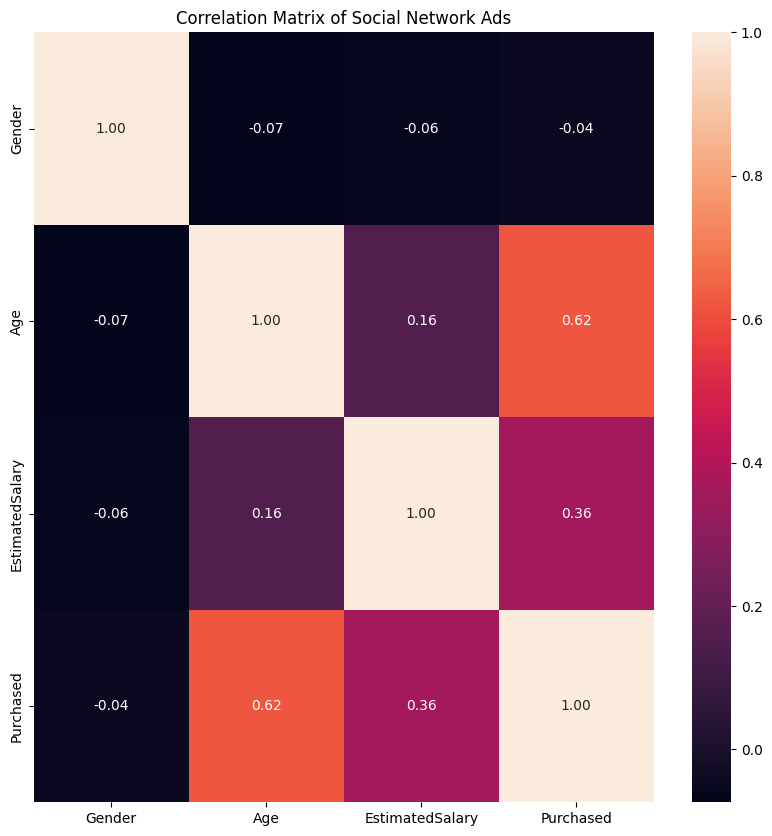

In [22]:
# Plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix of Social Network Ads")
plt.show()

In [23]:
# Split the dataset into features and target variable
X = df.drop('Purchased', axis="columns")
y = df['Purchased']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use transform instead of fit_transform on test set

In [25]:
# Train the SVM model
model = SVC(max_iter=10000)
model.fit(X_train, y_train)

SVC(max_iter=10000)

In [26]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

Accuracy score: 0.9393939393939394


Confusion Matrix:
 [[75  5]
 [ 3 49]]


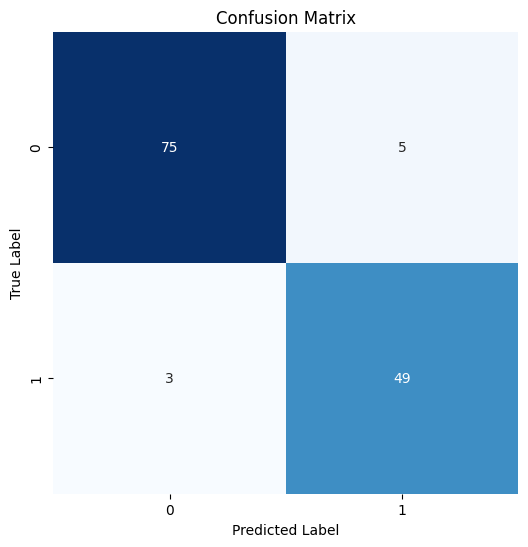

In [27]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()